# Install Libraries

In [ ]:
!pip install torchdata
!pip install imblearn

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import torch
from torchvision import transforms
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import cv2
import PIL.Image as Image
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Globals Variables

In [ ]:
# below variables are established to be used throughout the notebook without being subjected to any change
BATCH_SIZE     = 64
HEIGHT = WIDTH = 48
NCHANNELS      =  3

OPTIMIZER      = "adam"

TRANSFORMER    = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(.485, .456, .406), std=(.229, .224, .225)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=90),
])

EPOCHS         = 50

EMOTIONS       = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

LIMIT          = 1000

DEVICE         = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import files
import os
import zipfile
import cv2
import pandas as pd

base = 'dataset'

# Check if 'dataset' directory exists
if not os.path.exists(base):

    # Step 1: Upload the ZIP file to Colab
    print("Please upload your ZIP file.")
    uploaded = files.upload()

    # Assuming there's only one file uploaded & get its name
    zip_filename = next(iter(uploaded))

    # Step 2: Unzip the uploaded file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(base)

# Step 3: Process the dataset
paths = []
labels = []

if os.path.exists(path=base) and os.path.isdir(base):
    for level_1_dir in os.listdir(path=base): # train/test
        level_1_path = os.path.join(base, level_1_dir)
        if os.path.exists(path=level_1_path) and os.path.isdir(level_1_path):
            for level_2_dir in os.listdir(path=level_1_path): # 7 emotions
                level_2_path = os.path.join(level_1_path, level_2_dir)
                if os.path.exists(path=level_2_path) and os.path.isdir(level_2_path):
                    for file in os.listdir(path=level_2_path): # files
                        file_path = os.path.join(level_2_path, file)
                        if os.path.isfile(file_path):
                            paths.append(file_path)
                            labels.append(level_2_dir)

df = pd.DataFrame({'path': paths, 'label': labels})
# Create a new column to store the images as ndarray
df['img_as_matrix'] = df['path'].apply(lambda path: cv2.imread(path))

# View first 5 rows of the newly created dataframe
df.head()


Please upload your ZIP file.


Saving Dataset.zip to Dataset.zip


,path,label,img_as_matrix
0,dataset/test/surprise/PrivateTest_19541998.jpg,surprise,"[[[185, 185, 185], [180, 180, 180], [187, 187,..."
1,dataset/test/surprise/PrivateTest_25271151.jpg,surprise,"[[[200, 200, 200], [199, 199, 199], [198, 198,..."
2,dataset/test/surprise/PublicTest_17484027.jpg,surprise,"[[[181, 181, 181], [182, 182, 182], [185, 185,..."
3,dataset/test/surprise/PrivateTest_68447996.jpg,surprise,"[[[230, 230, 230], [230, 230, 230], [229, 229,..."
4,dataset/test/surprise/PublicTest_77715773.jpg,surprise,"[[[254, 254, 254], [247, 247, 247], [209, 209,..."


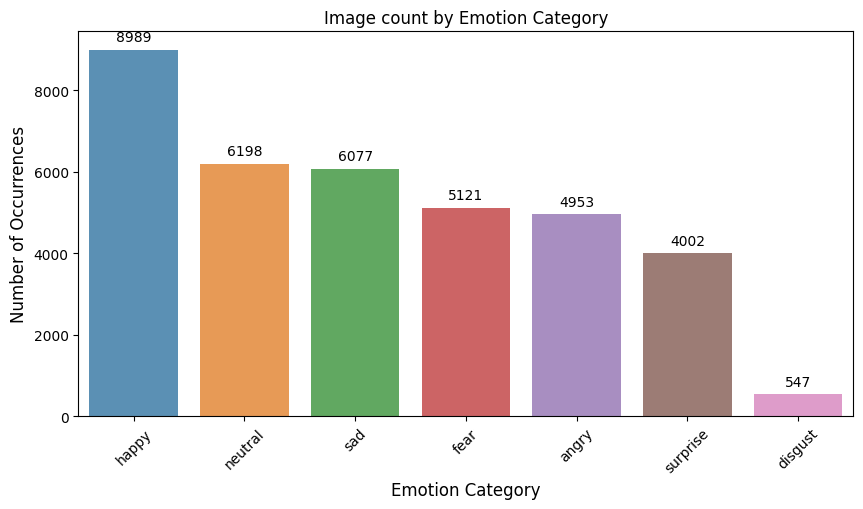

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named as 'df'
category_count = df['label'].value_counts()

# Plot
plt.figure(figsize=(10,5))
bar_plot = sns.barplot(x=category_count.index, y=category_count.values, alpha=0.8)
plt.title('Image count by Emotion Category')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion Category', fontsize=12)
plt.xticks(rotation=45)

# Add count on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.show()

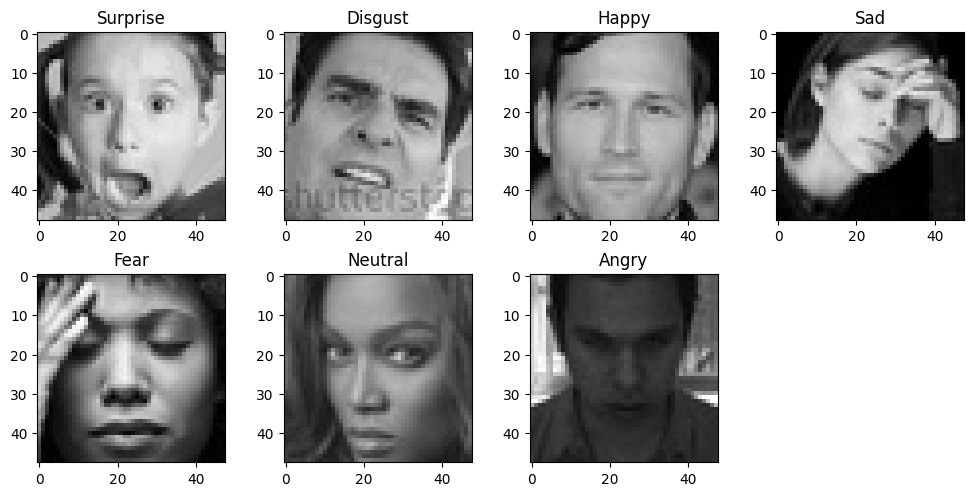

In [ ]:
# set plotting options
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

for index, label in enumerate(df['label'].unique()):
    img = df[df['label'] == label]['img_as_matrix'].iloc[0]

    exec(f"ax{index + 1}.imshow(img)")
    exec(f"ax{index + 1}.set_title(label.title())")

fig.tight_layout()

# For imagery datasets, provide the "average image" for each class.

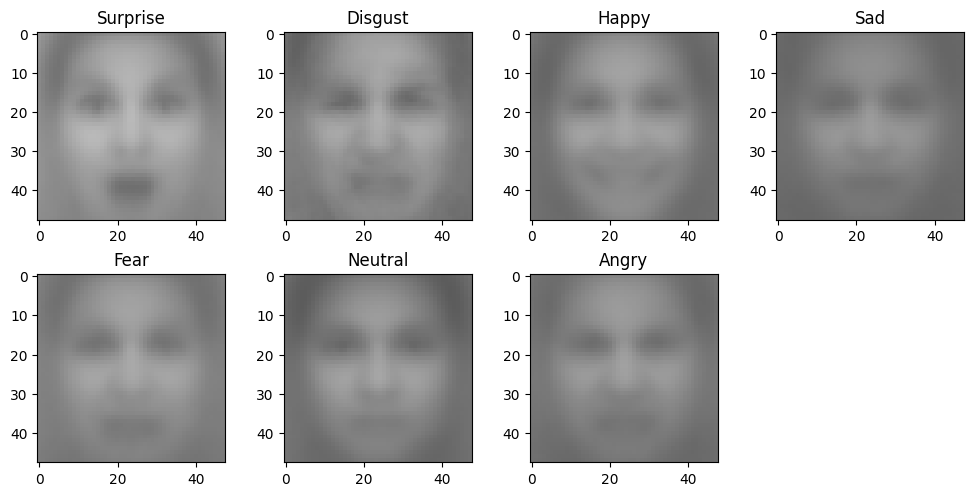

In [ ]:
# setplotting options
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

for index, label in enumerate(df['label'].unique()):
    avg_img = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.uint8)

    exec(f"ax{index + 1}.imshow(avg_img)")
    exec(f"ax{index + 1}.set_title(label.title())")

fig.tight_layout()

# Equalized images for more transparent view

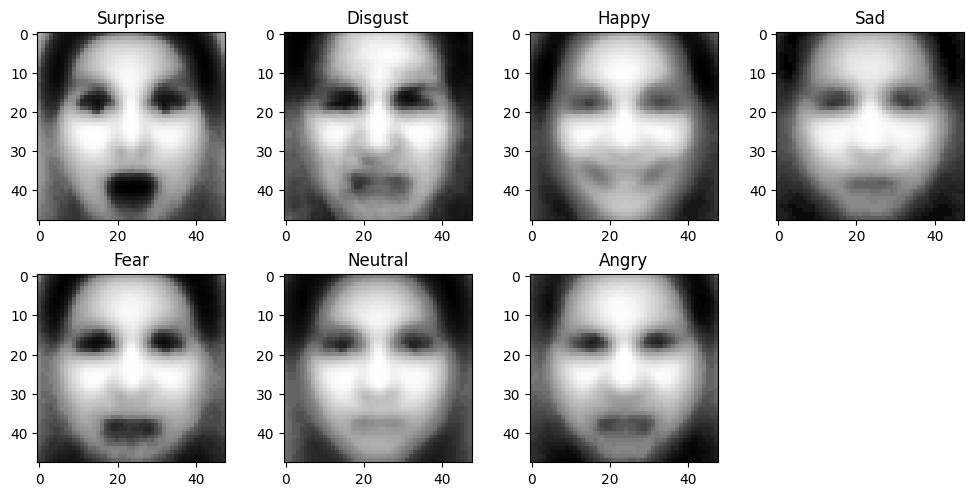

In [ ]:
# set plotting options - equalized images for more transparent view
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, _)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

for index, label in enumerate(df['label'].unique()):
    avg_img   = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.uint8)

    R, G, B   = cv2.split(avg_img)

    output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)

    equ = cv2.merge((output1_R, output1_G, output1_B))

    exec(f"ax{index + 1}.imshow(equ)")
    exec(f"ax{index + 1}.set_title(label.title())")

fig.tight_layout()

# Dataset distribution

<BarContainer object of 7 artists>

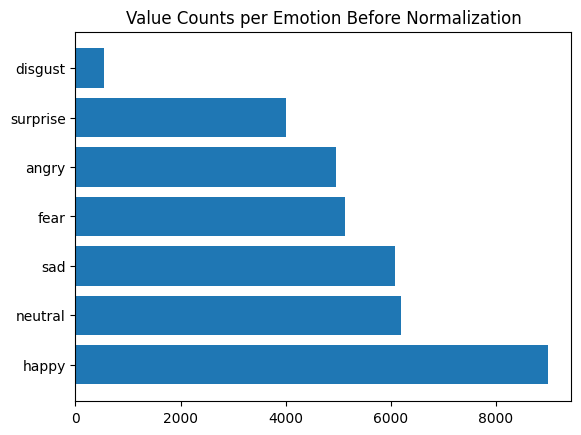

In [ ]:
plt.title('Value Counts per Emotion Before Normalization')
plt.barh(y = df.label.value_counts().index, width = df.label.value_counts().values)

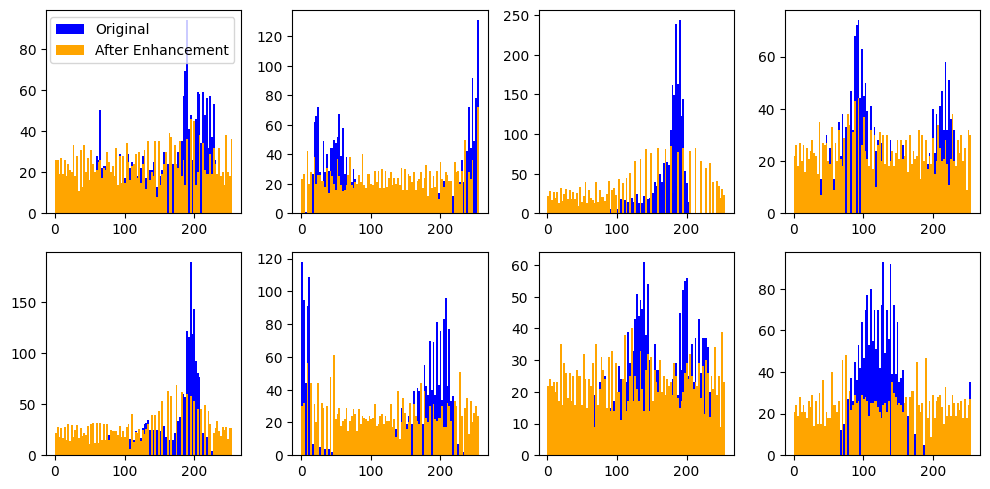

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(10, 5))

for index, img in enumerate(df['img_as_matrix'][:8]):

    # calculate mean value from RGB channels and flatten to 1D array
    img_1_chan = img.mean(axis=2).flatten().astype(np.uint8)

    # get the histogram equalized image
    equ = cv2.equalizeHist(img_1_chan)

    # plot original histogram (blue)
    exec(f"ax{index + 1}.hist(img_1_chan, bins=100, range=(0, 255), color='blue', label='Original')")

    # plot histogram after enhancement (orange)
    exec(f"ax{index + 1}.hist(equ, bins=100, range=(0, 255), color='orange', label='After Enhancement')")

    # add legend to the first subplot to avoid repetition
    if index == 0:
        exec(f"ax{index + 1}.legend(loc='upper right')")

plt.tight_layout()
plt.show()


# Removing missing data/bad images

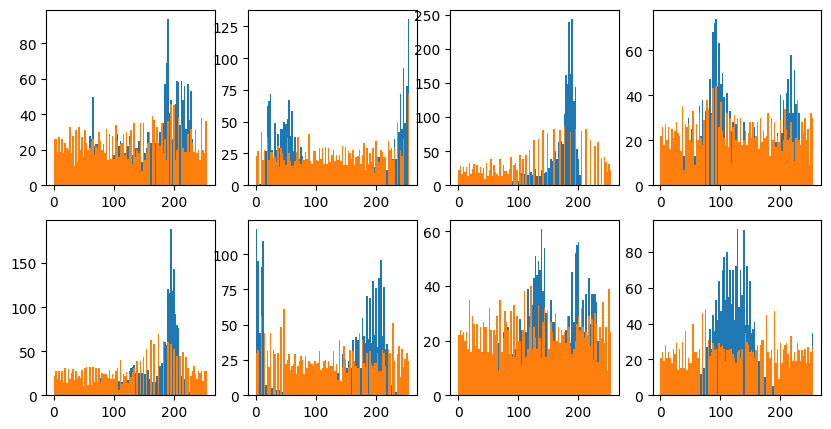

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(10, 5))

for index, img in enumerate(df['img_as_matrix'][:8]):

    # calculate mean value from RGB channels and flatten to 1D array
    img_1_chan = img.mean(axis=2).flatten().astype(np.uint8)

    # gett same
    equ = cv2.equalizeHist(img_1_chan)

    exec(f"ax{index + 1}.hist(img_1_chan, bins=100, range=(0, 255))")
    exec(f"ax{index + 1}.hist(equ, bins=100, range=(0, 255))")

# Average image per emotion

In [ ]:
# store the average image per emotion
average_image_per_label = {}

# compute the average image per label
for index, label in enumerate(df['label'].unique()):
    avg_img = np.stack(df[df['label'] == label]['img_as_matrix']).mean(axis=0).astype(np.int8)

    # store the result
    average_image_per_label[label] = avg_img

# Storing deltas between each image and its label's average

In [ ]:
deltas = []

for i in range(len(df)):
    label = df.loc[i, 'label']
    # find the delta between each image and its label's average
    delta = np.absolute(average_image_per_label[label] - df.loc[i, 'img_as_matrix'].astype(np.int8))
    deltas.append(delta)
#
df['delta_vs_avg_image'] = deltas

# Mean error across all channels

In [ ]:
df['mean_error'] = df['delta_vs_avg_image'].apply(lambda x: x.mean())

# Find an average mean error per group

In [ ]:
# find an average mean error per group
mean_errors_per_label = df.groupby('label')['mean_error'].mean()

# store standard deviations
error_stds = []

for i in range(len(df)):
    label = df.loc[i, 'label']
    # compute variance between mean error of each image and average error for label
    var = abs(df.loc[i, 'mean_error'] - mean_errors_per_label[label])**2
    # compute standard deviation from variance
    std = np.sqrt(var)
    # store the result
    error_stds.append(std)

df['error_std'] = error_stds

In [ ]:
df.head()

,path,label,img_as_matrix,delta_vs_avg_image,mean_error,error_std
0,dataset/test/surprise/PrivateTest_19541998.jpg,surprise,"[[[185, 185, 185], [180, 180, 180], [187, 187,...","[[[32, 32, 32], [33, 33, 33], [45, 45, 45], [4...",48.749566,1.851939
1,dataset/test/surprise/PrivateTest_25271151.jpg,surprise,"[[[200, 200, 200], [199, 199, 199], [198, 198,...","[[[47, 47, 47], [52, 52, 52], [56, 56, 56], [6...",84.026042,33.424537
2,dataset/test/surprise/PublicTest_17484027.jpg,surprise,"[[[181, 181, 181], [182, 182, 182], [185, 185,...","[[[28, 28, 28], [35, 35, 35], [43, 43, 43], [3...",34.035156,16.566348
3,dataset/test/surprise/PrivateTest_68447996.jpg,surprise,"[[[230, 230, 230], [230, 230, 230], [229, 229,...","[[[77, 77, 77], [83, 83, 83], [87, 87, 87], [9...",52.371528,1.770023
4,dataset/test/surprise/PublicTest_77715773.jpg,surprise,"[[[254, 254, 254], [247, 247, 247], [209, 209,...","[[[101, 101, 101], [100, 100, 100], [67, 67, 6...",40.259549,10.341956


# Standard deviation boundaries

In [ ]:
# compute standard deviation boundaries
min_std = df['error_std'].min()
max_std = df['error_std'].max()


# treat the image as anomalous if its mean error is below or above standard deviation boundaries.
def get_anomalous_point(mean_error: float, min_std: float, max_std: float):
    return mean_error < min_std or mean_error > max_std

# mark images as anomalous or not
df['check_for_anomalies'] = df['mean_error'].apply(
    lambda err: get_anomalous_point(err, min_std, max_std)
)

# Anomalous images to drop

In [ ]:
# retrieve indices of the anomalous images to drop
image_indices_to_drop = list(df[df['check_for_anomalies'] == True].index)

# drop anomalous image indices,reset index, and update dataframe
df = df.drop(image_indices_to_drop).reset_index(drop=True)

In [ ]:
# print planned to be dropped indices
print(f"How many images gets dropped: {len(image_indices_to_drop)}\nSome samples: {image_indices_to_drop[:20]}\n")



print("Printing first 5 rows from dataframe")
df.head()

How many images gets dropped: 9143
Some samples: [1, 16, 18, 20, 27, 28, 30, 32, 34, 35, 40, 41, 42, 44, 45, 46, 52, 53, 54, 57]

Printing first 5 rows from dataframe


,path,label,img_as_matrix,delta_vs_avg_image,mean_error,error_std,check_for_anomalies
0,dataset/test/surprise/PrivateTest_19541998.jpg,surprise,"[[[185, 185, 185], [180, 180, 180], [187, 187,...","[[[32, 32, 32], [33, 33, 33], [45, 45, 45], [4...",48.749566,1.851939,False
1,dataset/test/surprise/PublicTest_17484027.jpg,surprise,"[[[181, 181, 181], [182, 182, 182], [185, 185,...","[[[28, 28, 28], [35, 35, 35], [43, 43, 43], [3...",34.035156,16.566348,False
2,dataset/test/surprise/PrivateTest_68447996.jpg,surprise,"[[[230, 230, 230], [230, 230, 230], [229, 229,...","[[[77, 77, 77], [83, 83, 83], [87, 87, 87], [9...",52.371528,1.770023,False
3,dataset/test/surprise/PublicTest_77715773.jpg,surprise,"[[[254, 254, 254], [247, 247, 247], [209, 209,...","[[[101, 101, 101], [100, 100, 100], [67, 67, 6...",40.259549,10.341956,False
4,dataset/test/surprise/PublicTest_91929864.jpg,surprise,"[[[183, 183, 183], [172, 172, 172], [171, 171,...","[[[30, 30, 30], [25, 25, 25], [29, 29, 29], [4...",56.233941,5.632436,False


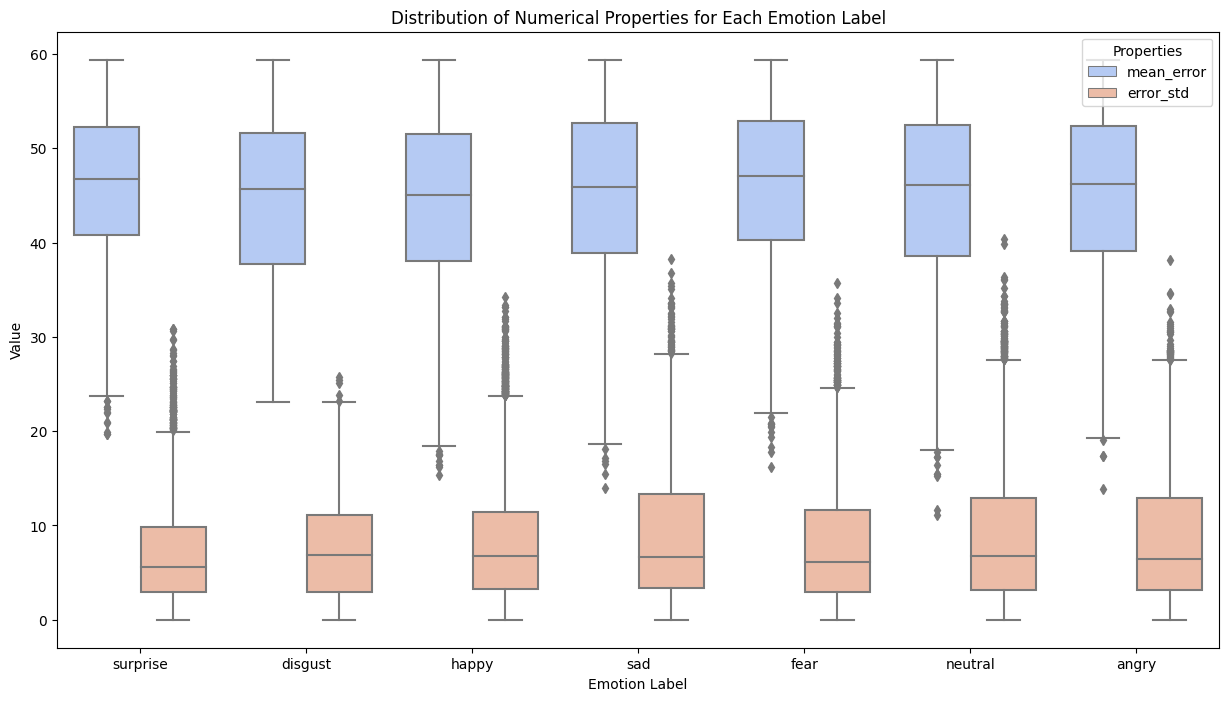

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe for plotting
df_melted = df.melt(id_vars='label', value_vars=['mean_error', 'error_std'])

plt.figure(figsize=(15, 8))
sns.boxplot(x='label', y='value', hue='variable', data=df_melted, palette='coolwarm')
plt.title('Distribution of Numerical Properties for Each Emotion Label')
plt.ylabel('Value')
plt.xlabel('Emotion Label')
plt.legend(title='Properties', loc='upper right')
plt.show()


<ipython-input-21-2e2b617b7c86>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['label'] == label]['mean_error'], kde=False, label=label)


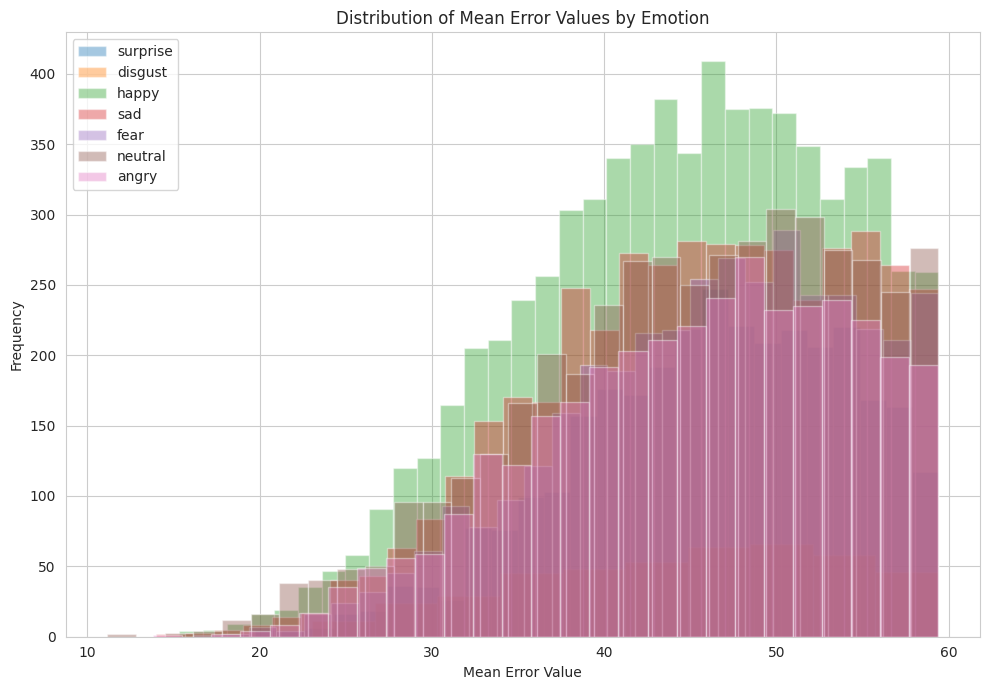

In [ ]:
# Set style
sns.set_style('whitegrid')

# Initialize the figure
plt.figure(figsize=(10, 7))

# Draw histograms
for label in df['label'].unique():
    sns.distplot(df[df['label'] == label]['mean_error'], kde=False, label=label)

# Setting title and labels
plt.title('Distribution of Mean Error Values by Emotion')
plt.xlabel('Mean Error Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


# Synthetic Minority Oversampling Technique (TO Handle the imbalance in the dataset)

In [ ]:
# label encoding
df['labels_numeric'] = [EMOTIONS.index(label) for label in df['label']]

In [ ]:
# assigning labels to y
y = df['labels_numeric']

# X is a list of read-in images
X = np.stack(df['img_as_matrix'])

# get all dimensions of the resulting X
n_samples, height, width, n_channels = [X.shape[index] for index in range(4)]

print(f"Shape of X before reshape: {X.shape}")

# reshape X because SMOTE accepts only (n_samples, n_channels*height*weight)-type data
X_reshaped = X.reshape(n_samples, n_channels*height*width)

print(f"Shape of X before reshape: {X.shape}")

Shape of X before reshape: (26744, 48, 48, 3)
Shape of X before reshape: (26744, 48, 48, 3)


In [ ]:
# initialize the SMOTE model
smote = SMOTE(random_state=62)

In [ ]:
# perform re-sampling on modified X given y
X_smote, y_smote = smote.fit_resample(X_reshaped, y)

In [ ]:
print(f'Before re-sampling, the amount of images:  {len(X):6}')
print(f'After re-sampling, the amount of images :{len(X_smote):8}')

Before re-sampling, the amount of images:   26744
After re-sampling, the amount of images :   49154


<BarContainer object of 7 artists>

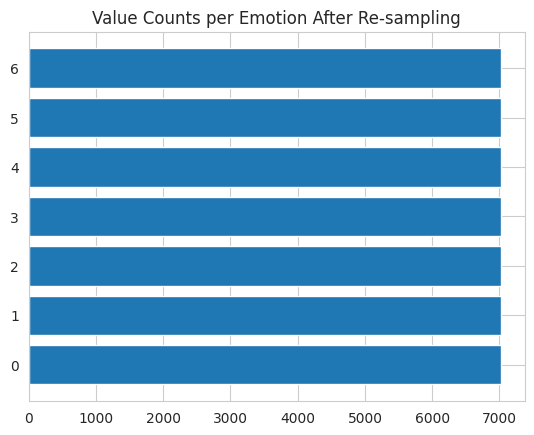

In [ ]:
# view the resulting balanced data(modified distribution)
plt.title('Value Counts per Emotion After Re-sampling')
plt.barh(y = y_smote.value_counts().index, width = y_smote.value_counts().values)

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

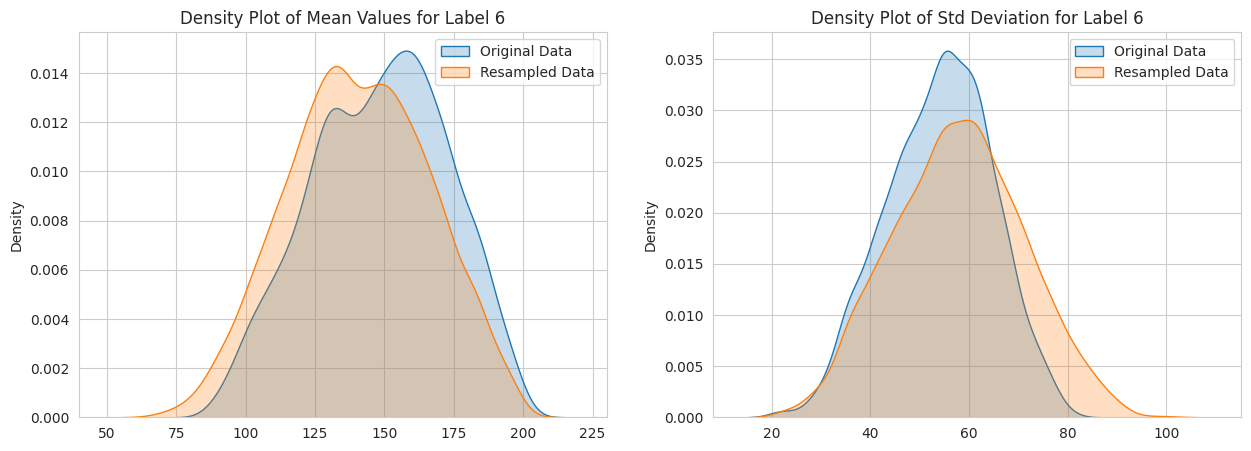

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

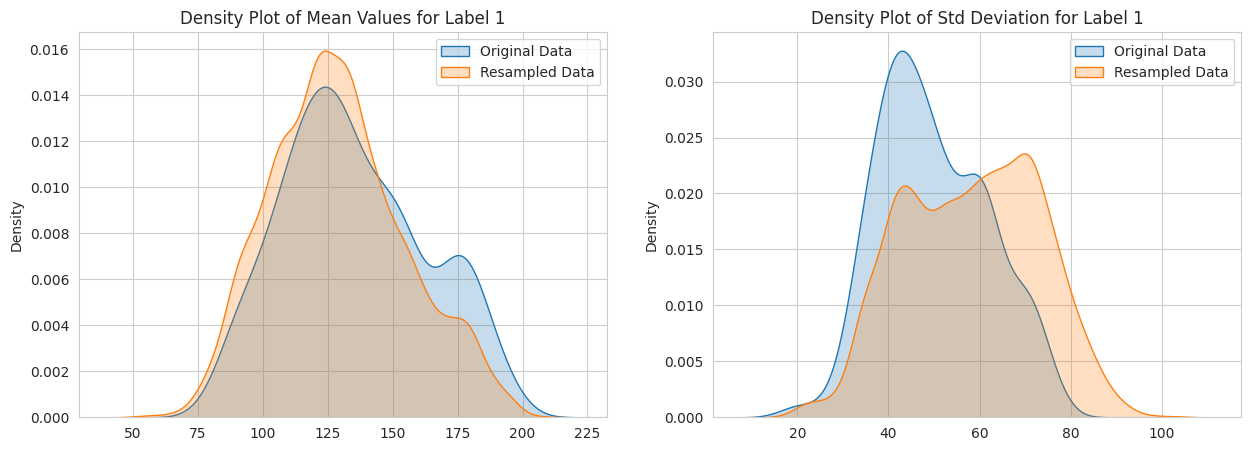

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

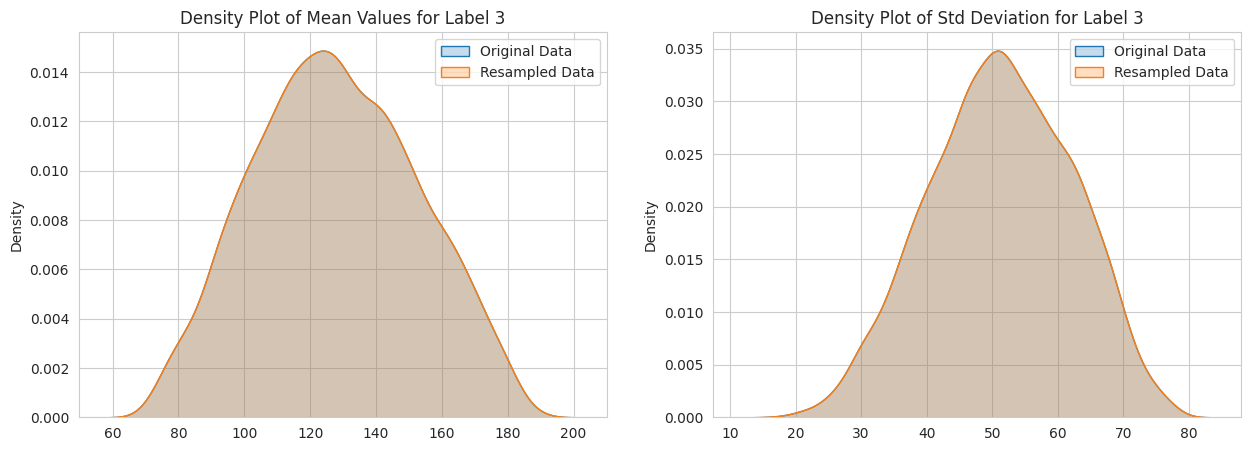

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

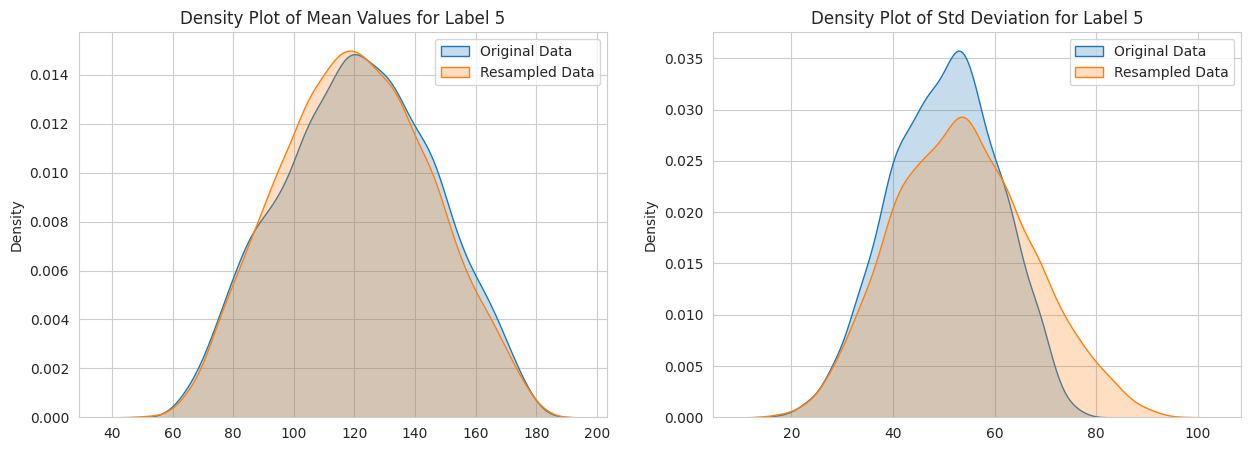

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

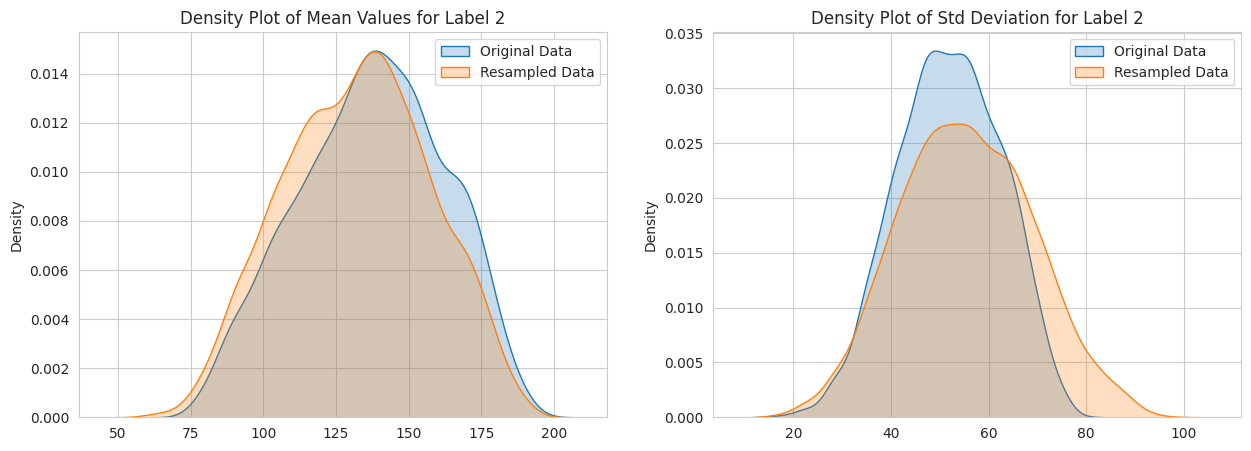

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

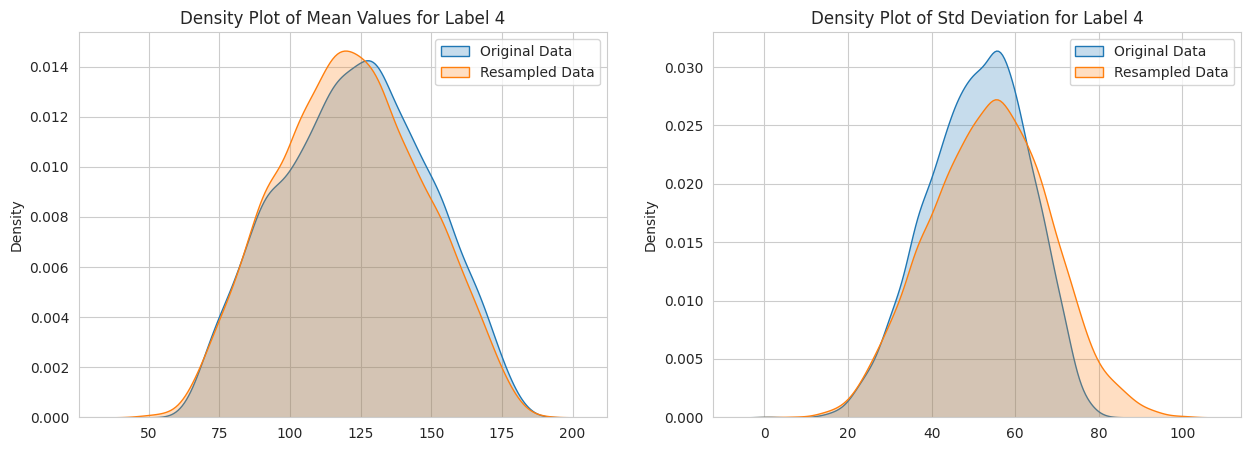

<ipython-input-28-60724b2b89b5>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_means, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
<ipython-input-28-60724b2b89b5>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_stds, label="Original Data", shade=True)
<ipython-input-28-60724b2b89b5>:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(resampled_stds, label=

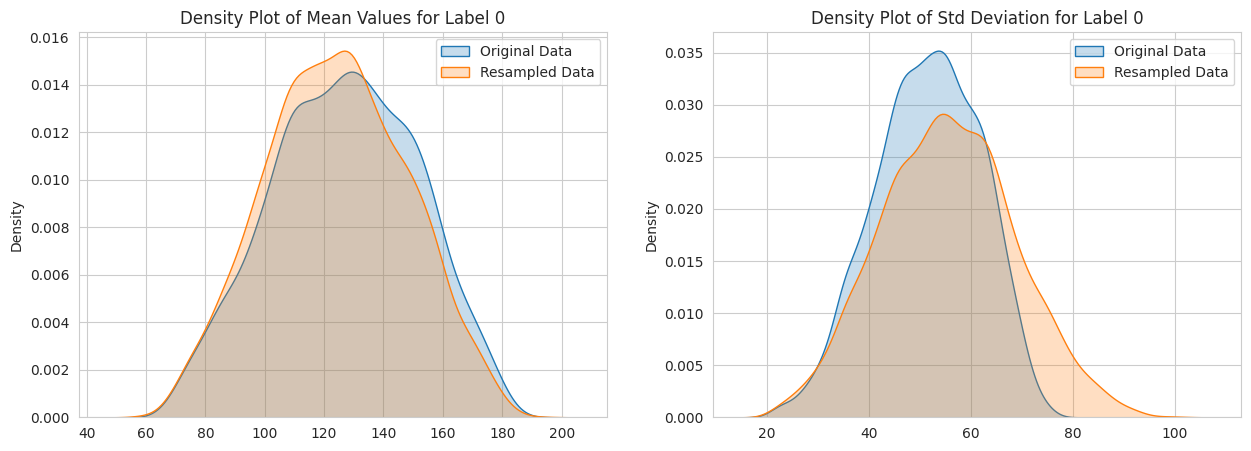

In [ ]:
df_original = pd.DataFrame(X_reshaped)
df_original['label'] = y

df_resampled = pd.DataFrame(X_smote)
df_resampled['label'] = y_smote

unique_labels = df_original['label'].unique()

for label in unique_labels:
    original_data = df_original[df_original['label'] == label].drop(columns='label')
    resampled_data = df_resampled[df_resampled['label'] == label].drop(columns='label')

    # Calculate mean and std for both datasets
    original_means = original_data.mean(axis=1)
    original_stds = original_data.std(axis=1)

    resampled_means = resampled_data.mean(axis=1)
    resampled_stds = resampled_data.std(axis=1)

    # Plotting
    plt.figure(figsize=(15, 5))

    # Mean Values
    plt.subplot(1, 2, 1)
    sns.kdeplot(original_means, label="Original Data", shade=True)
    sns.kdeplot(resampled_means, label="Resampled Data", shade=True)
    plt.title(f"Density Plot of Mean Values for Label {label}")
    plt.legend()

    # Standard Deviations
    plt.subplot(1, 2, 2)
    sns.kdeplot(original_stds, label="Original Data", shade=True)
    sns.kdeplot(resampled_stds, label="Resampled Data", shade=True)
    plt.title(f"Density Plot of Std Deviation for Label {label}")
    plt.legend()

    plt.show()

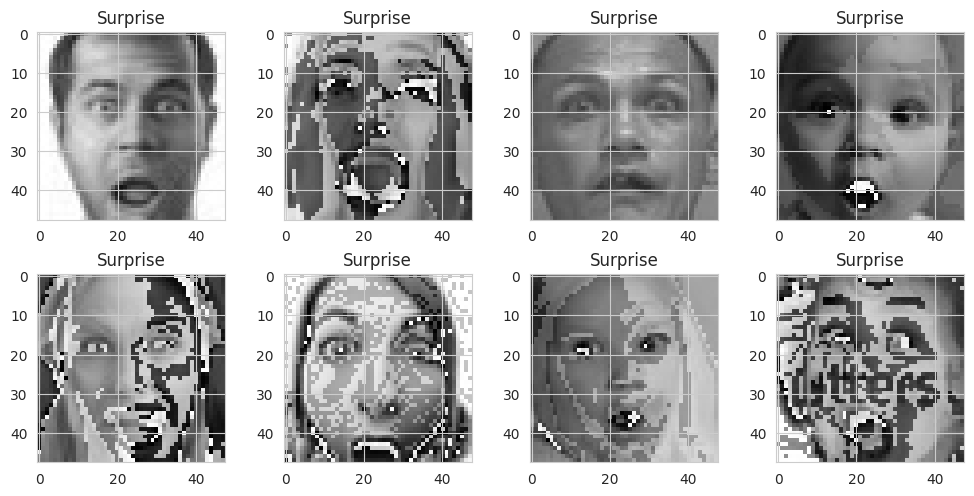

In [ ]:
# set plotting options
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(10, 5))
_.set_visible(False)

# reshape each SMOTE image into (h, w, n_channels) format
for index, (image, label) in enumerate(zip(X_smote[-9:-1], y_smote[-9:-1])):
    img_to_plot = image.reshape((HEIGHT, WIDTH, NCHANNELS))

    exec(f"ax{index + 1}.imshow(img_to_plot)")
    exec(f"ax{index + 1}.set_title(EMOTIONS[label].title())")

fig.tight_layout()

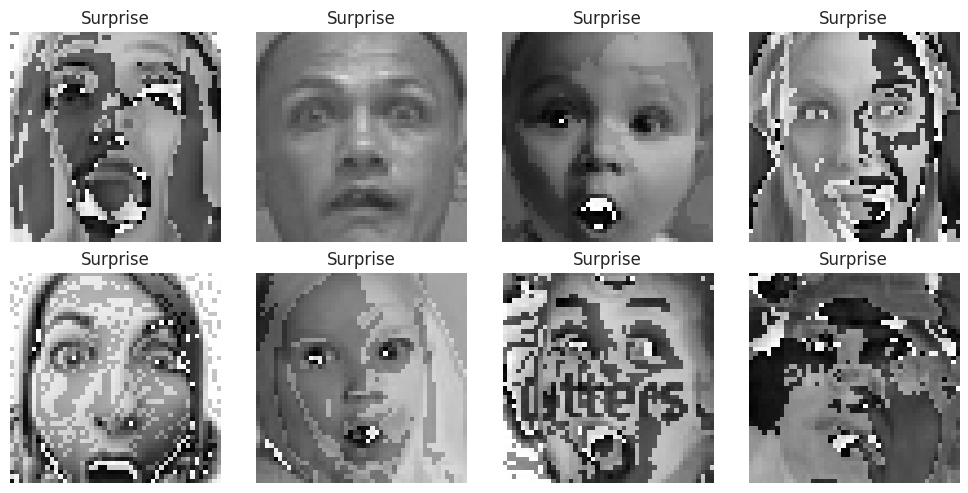

In [ ]:
# Define the grid for plotting
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# Use the last 8 images from the resampled data
images_to_plot = X_smote[-8:].reshape(-1, HEIGHT, WIDTH, NCHANNELS)
labels_to_plot = y_smote[-8:]

# Plot each image
for ax, image, label in zip(axes.ravel(), images_to_plot, labels_to_plot):
    ax.imshow(image)
    ax.set_title(EMOTIONS[label].title())
    ax.axis('off')

# Adjust layout for better presentation
fig.tight_layout()

plt.show()

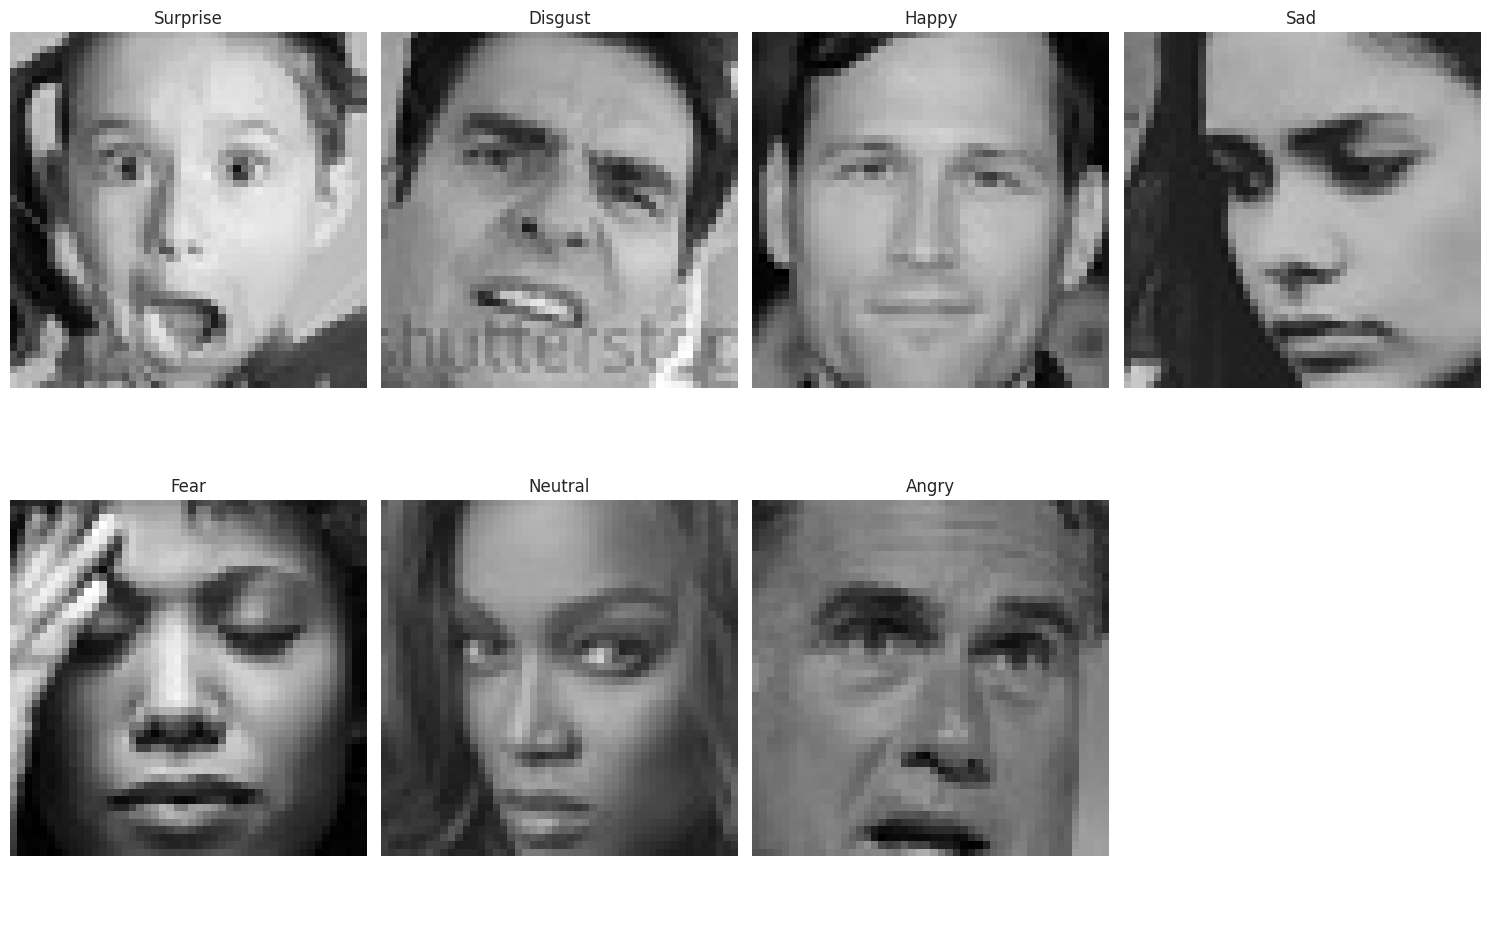

In [ ]:
# Determine the number of unique labels
n_unique_labels = len(np.unique(y_smote))

# Calculate number of rows and columns for the subplot layout
n_rows = int(np.ceil(n_unique_labels / 4))
n_cols = 4 if n_unique_labels > 4 else n_unique_labels

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Ensure axes is always a 2D array, even if there's only one row
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

# Create a list of already plotted labels to avoid duplicates
plotted_labels = []

# List for storing images to be plotted
images_to_plot = []
labels_to_plot = []

for image, label in zip(X_smote, y_smote):
    if label not in plotted_labels:
        images_to_plot.append(image.reshape(HEIGHT, WIDTH, NCHANNELS))
        labels_to_plot.append(label)
        plotted_labels.append(label)

# Plot each image
for ax, image, label in zip(axes.ravel(), images_to_plot, labels_to_plot):
    ax.imshow(image)
    ax.set_title(EMOTIONS[label].title())
    ax.axis('off')

# Hide any extra subplots
for i in range(n_unique_labels, n_rows * n_cols):
    axes.ravel()[i].axis('off')

# Adjust layout for better presentation
fig.tight_layout()

plt.show()


# Limiting Dataset Size

In [ ]:
# each category is limited to 1000 samples for easy training
limit_counter = {i:0 for i, _ in enumerate(EMOTIONS)}

X_smote_limited = []
y_smote_limited = []

for x, y in zip(X_smote, y_smote):
    if limit_counter[y] < LIMIT:
        X_smote_limited.append(x)
        y_smote_limited.append(y)

        limit_counter[y] += 1

X_smote_limited = np.array(X_smote_limited)
y_smote_limited = pd.Series(data=y_smote_limited)

In [ ]:
X_smote_limited

array([[185, 185, 185, ...,  58,  58,  58],
       [181, 181, 181, ..., 180, 180, 180],
       [230, 230, 230, ...,  28,  28,  28],
       ...,
       [ 79,  79,  79, ...,  59,  59,  59],
       [173, 173, 173, ..., 225, 225, 225],
       [ 68,  68,  68, ...,  42,  42,  42]], dtype=uint8)

In [ ]:
y_smote_limited

0       6
1       6
2       6
3       6
4       6
       ..
6995    1
6996    1
6997    1
6998    1
6999    1
Length: 7000, dtype: int64

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 6 * 6, 256) # Assuming the input size is 48x48
        self.fc2 = nn.Linear(256, num_classes)

        # Dropout to avoid overfitting
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool1(F.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool2(F.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool3(F.relu(self.batchnorm3(self.conv3(x))))

        # Flatten the tensor
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = EmotionCNN().to(DEVICE)
print(model)


EmotionCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2304, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
